In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
from google.colab import files

In [4]:
df = pd.read_csv('desafio_indicium_imdb.csv')
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [5]:
print("Formato:", df.shape)

df.info()

df.describe()

df.isna().sum()

Formato: (999, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


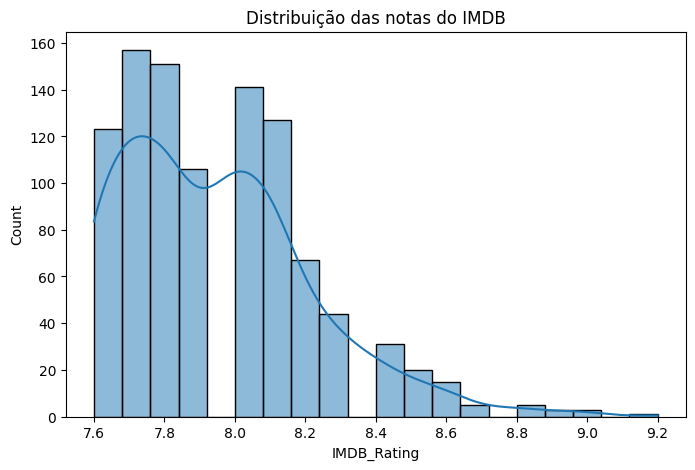

In [6]:
# Distribuição das notas do IMDB
plt.figure(figsize=(8,5))
sns.histplot(df["IMDB_Rating"], bins=20, kde=True)
plt.title("Distribuição das notas do IMDB")
plt.show()

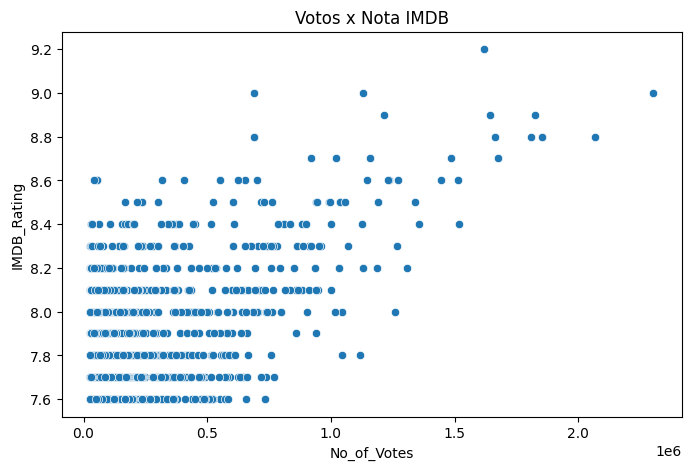

In [7]:
# Relação entre votos e nota
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="No_of_Votes", y="IMDB_Rating")
plt.title("Votos x Nota IMDB")
plt.show()

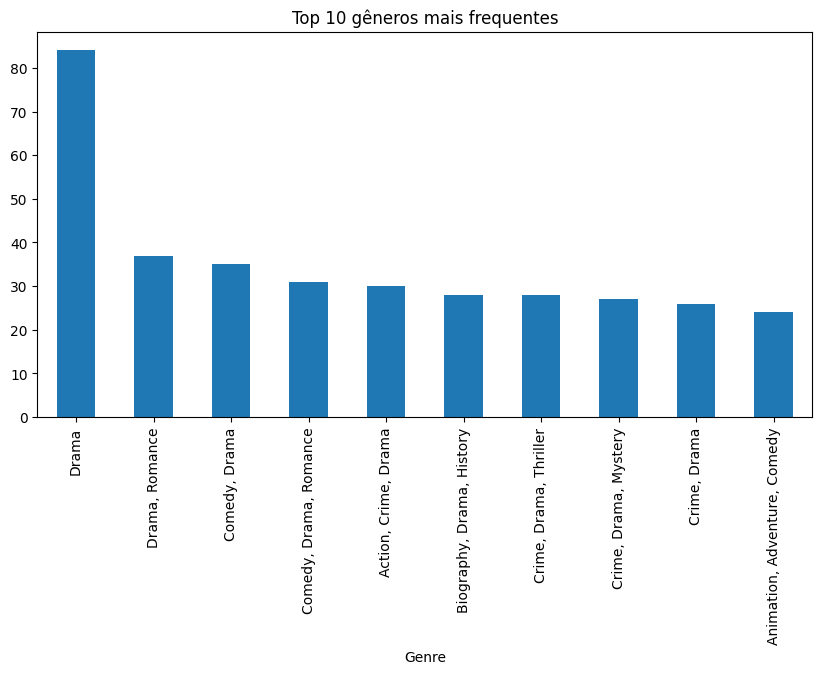

In [8]:
# Gêneros mais comuns
plt.figure(figsize=(10,5))
df["Genre"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 gêneros mais frequentes")
plt.show()

In [9]:
# Corrigir 'Runtime' -> remove " min" e converte para float
df["Runtime"] = df["Runtime"].str.replace(" min", "", regex=True).astype(float)

# Corrigir 'Gross' -> remove vírgulas e converte para float
df["Gross"] = df["Gross"].replace({',': ''}, regex=True).astype(float)

# Criar dataframe só com features numéricas + target
df_model = df[["Runtime", "Meta_score", "No_of_Votes", "Gross", "IMDB_Rating"]].dropna()

# Treino e Teste
X = df_model.drop("IMDB_Rating", axis=1)
y = df_model["IMDB_Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo simples
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliação
y_pred = model.predict(X_test)

# MSE e RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.04084184783195108
RMSE: 0.20209366103851717


In [10]:
# Salvar modelo treinado
joblib.dump(model, "modelo_imdb.pkl")

# Fazer download do arquivo
files.download("modelo_imdb.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Questão 4

In [11]:
# Criar o dicionário com os dados do Shawshank
shawshank = {
    "Runtime": 142,
    "Meta_score": 80.0,
    "No_of_Votes": 2343110,
    "Gross": 28341469.0
}

# Transformar em DataFrame
shawshank_df = pd.DataFrame([shawshank])

# Fazer a previsão
predicted_rating = model.predict(shawshank_df)[0]
print("Nota prevista para Shawshank Redemption:", round(predicted_rating, 2))

Nota prevista para Shawshank Redemption: 9.24
